In [9]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import sys
sys.path.append('../code/')
import d2lzh_pytorch as d2l

In [10]:
n_train,n_test,num_inputs=20,100,200
true_w,true_b=torch.ones(num_inputs,1)*0.01,0.05

features=torch.randn((n_train+n_test,num_inputs))
labels=torch.mm(features,true_w)+true_b
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)
train_features=features[:n_train,:]
train_lables=labels[:n_train]
test_features=features[n_train:,:]
test_labels=labels[n_train:]

In [11]:
def init_params():
    w=torch.randn((num_inputs,1),requires_grad=True)
    b=torch.zeros(1,requires_grad=True)
    return [w,b]

In [12]:
def l2_penalty(w):
    return (w**2).sum()/2

In [15]:
batch_size,num_epochs,lr=1,100,0.003
net,loss=d2l.linreg,d2l.squared_loss

dataset=torch.utils.data.TensorDataset(train_features,train_lables)
train_iter=torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)

def fit_and_plot(lambd):
    w,b=init_params()
    train_ls,test_ls=[],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            l=loss(net(X,w,b),y)+lambd*l2_penalty(w)
            l=l.sum()
            
            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
            d2l.sgd([w,b],lr,batch_size)
        train_ls.append(loss(net(train_features,w,b),train_lables).mean().item())
        test_ls.append(loss(net(test_features,w,b),test_labels).mean().item())
    d2l.semilogy(range(1,num_epochs+1),train_ls,'epochs','loss',
                    range(1,num_epochs+1),test_ls,['train','test'])
    print('L2 norm of w:',w.norm().item())    

L2 norm of w: 13.325922966003418


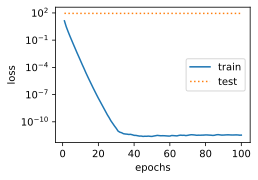

In [16]:
fit_and_plot(lambd=0)

L2 norm of w: 0.05173557624220848


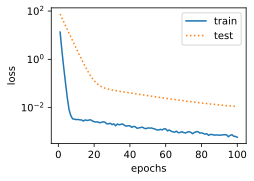

In [17]:
fit_and_plot(lambd=3)

In [23]:
def fit_and_plot_pytorch(wd):
    net=nn.Linear(num_inputs,1)
    nn.init.normal_(net.weight,mean=0,std=1)
    nn.init.normal_(net.bias,mean=0,std=1)
    optimizer_w=torch.optim.SGD(params=[net.weight],lr=lr,weight_decay=wd)
    optimizer_b=torch.optim.SGD(params=[net.bias],lr=lr)
    
    train_ls,test_ls=[],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            l=loss(net(X),y).mean()
            optimizer_w.zero_grad()
            optimizer_b.zero_grad()
            l.backward()
            
            optimizer_w.step()
            optimizer_b.step()
        
        train_ls.append(loss(net(train_features),train_lables).mean().item())
        test_ls.append(loss(net(test_features),test_labels).mean().item())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:',net.weight.data.norm().item())

L2 norm of w: 13.272811889648438


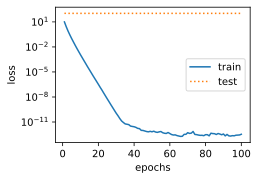

In [24]:
fit_and_plot_pytorch(0)

L2 norm of w: 0.0364912673830986


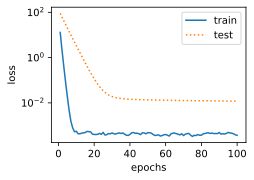

In [25]:
fit_and_plot_pytorch(3)